<a href="https://colab.research.google.com/github/kwasicode/Artificial-Intelligence/blob/main/tpms_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

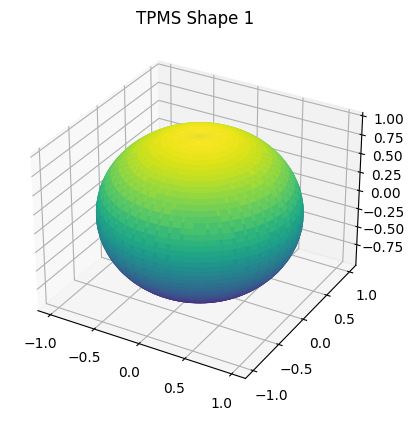

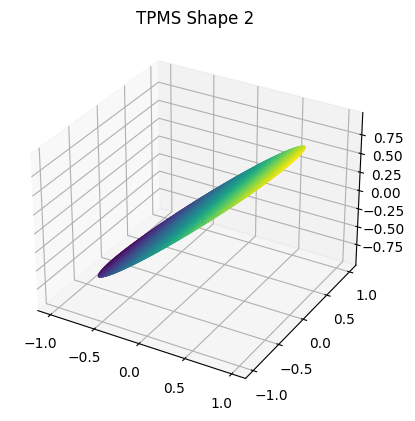

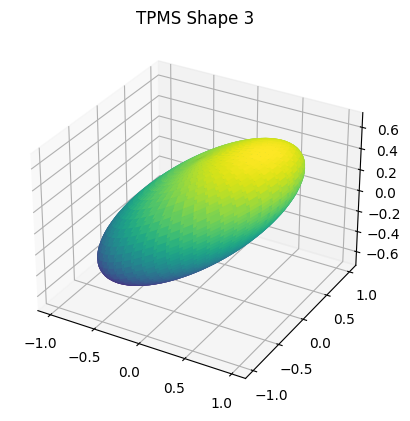

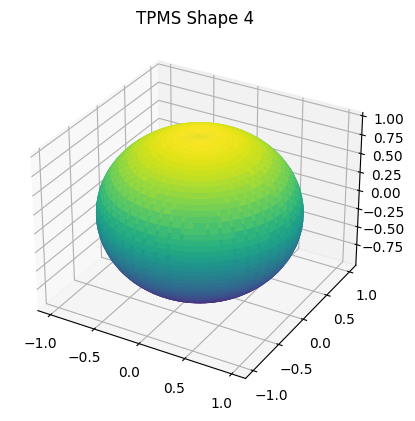

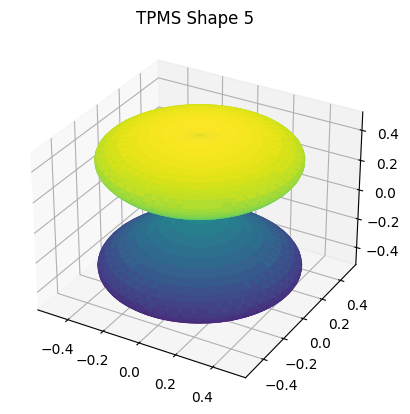

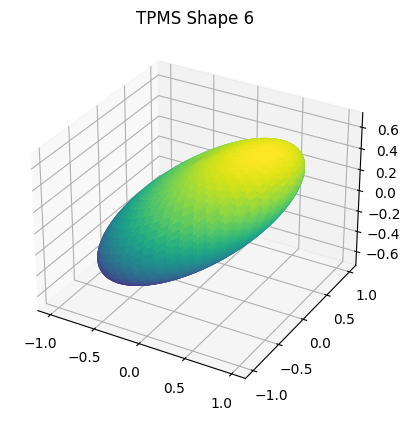

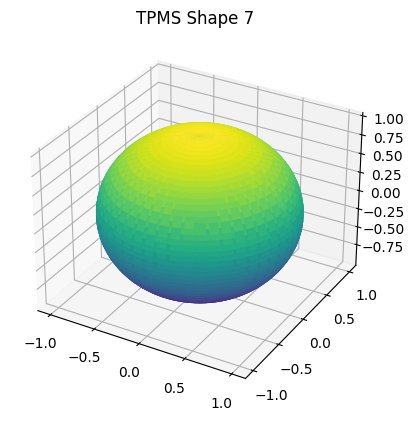

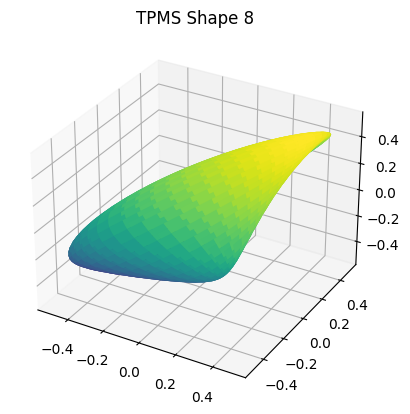

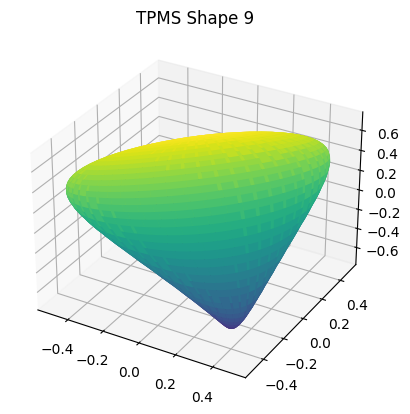

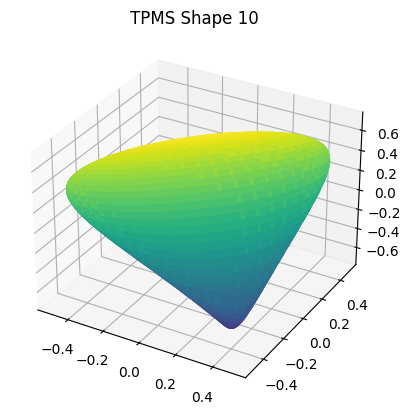

Generated Data:
          K    L         M  Porosity  Pore_Size  Pressure_Drop  \
0  0.000000  0.0  1.000000      0.39      0.019            1.1   
1  0.063424  0.0  0.997987      0.36      0.024            1.2   
2  0.126592  0.0  0.991955      0.41      0.016            1.1   
3  0.189251  0.0  0.981929      0.38      0.017            1.3   
4  0.251148  0.0  0.967949      0.38      0.016            1.4   

   Heat_Transfer_Coefficient  Energy_Dissipation  
0                       0.81                0.95  
1                       0.82                0.90  
2                       0.76                0.92  
3                       0.83                0.94  
4                       0.81                0.88  
Column Names: Index(['K', 'L', 'M', 'Porosity', 'Pore_Size', 'Pressure_Drop',
       'Heat_Transfer_Coefficient', 'Energy_Dissipation'],
      dtype='object')
Epoch 1/5
10000/10000 [==============================] - 29s 3ms/step - loss: 1.0004 - val_loss: 1.0007
Epoch 2/5
10000/10

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Function to generate Gyroid TPMS structure
def gyroid(u, v):
    x = np.sin(u) * np.cos(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(u)
    return x, y, z

# Function to generate Diamond TPMS structure
def diamond(u, v):
    x = np.sin(u) * np.cos(v)
    y = np.sin(u) * np.sin(v)
    z = np.sin(u) * np.cos(v)
    return x, y, z

# Function to generate Primitive TPMS structure
def primitive(u, v):
    x = np.sin(u) * np.cos(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(u)
    return x, y, z

# Function to generate Schwarz P TPMS structure
def schwarz_p(u, v):
    x = 0.5 * np.sin(2 * u) * np.sin(v)
    y = 0.5 * np.sin(2 * u) * np.cos(v)
    z = 0.5 * np.cos(u)
    return x, y, z

# Function to generate hybrid TPMS structure
def hybrid(u, v, func1, func2):
    x1, y1, z1 = func1(u, v)
    x2, y2, z2 = func2(u, v)
    x = 0.5 * (x1 + x2)
    y = 0.5 * (y1 + y2)
    z = 0.5 * (z1 + z2)
    return x, y, z

# Create a DataFrame to store shape and design property data
all_data = pd.DataFrame()

# List of TPMS functions
tpms_functions = [
    gyroid,
    diamond,
    lambda u, v: hybrid(u, v, gyroid, diamond),
    primitive,
    schwarz_p,
    lambda u, v: hybrid(u, v, diamond, primitive),
    lambda u, v: hybrid(u, v, gyroid, primitive),
    lambda u, v: hybrid(u, v, schwarz_p, diamond),
    lambda u, v: hybrid(u, v, schwarz_p, primitive),
    lambda u, v: hybrid(u, v, schwarz_p, gyroid)
]

# Generate shapes and attach random design properties
for i, tpms_func in enumerate(tpms_functions):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, 2 * np.pi, 100)
    u, v = np.meshgrid(u, v)
    x, y, z = tpms_func(u, v)

    # Attach synthetic design properties for each point in the shape
    design_properties = {
        'Porosity': np.round(np.random.uniform(0.35, 0.5, x.shape), 2),
        'Pore_Size': np.round(np.random.uniform(0.015, 0.025, x.shape), 3),
        'Pressure_Drop': np.round(np.random.uniform(1.0, 1.6, x.shape), 1),
        'Heat_Transfer_Coefficient': np.round(np.random.uniform(0.75, 0.85, x.shape), 2),
        'Energy_Dissipation': np.round(np.random.uniform(0.87, 0.95, x.shape), 2)
    }

    # Save shape and design properties to the DataFrame
    shape_data = pd.DataFrame({'K': x.flatten(), 'L': y.flatten(), 'M': z.flatten()})
    for prop_name, prop_values in design_properties.items():
        shape_data[prop_name] = prop_values.flatten()

    all_data = pd.concat([all_data, shape_data], ignore_index=True)

    # Plot the generated shape
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f'TPMS Shape {i + 1}')
    ax.plot_surface(x, y, z, cmap='viridis')
    plt.show()

# Print the generated data
print("Generated Data:")
print(all_data.head())

# Drop rows with NaN values in the 'K', 'L', 'M' columns
all_data = all_data.dropna(subset=['K', 'L', 'M'])

# Print column names to check
print("Column Names:", all_data.columns)

# Use 'Porosity', 'Pore_Size', 'Pressure_Drop', 'Heat_Transfer_Coefficient', 'Energy_Dissipation' as input features
X = all_data[['Porosity', 'Pore_Size', 'Pressure_Drop', 'Heat_Transfer_Coefficient', 'Energy_Dissipation']].values

# Use 'K', 'L', 'M' as target variables
y = all_data[['K', 'L', 'M']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the scaler for input features on the training data
scaler_input = StandardScaler()
scaler_input.fit(X_train)

# Standardize the input features for training and testing sets
X_train_scaled = scaler_input.transform(X_train)
X_test_scaled = scaler_input.transform(X_test)

# Create and fit the scaler for output features on the training data
scaler_output = StandardScaler()
scaler_output.fit(y_train)

# Standardize the output features for training and testing sets
y_train_scaled = scaler_output.transform(y_train)
y_test_scaled = scaler_output.transform(y_test)


# Build a more complex neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(5,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))  # Additional hidden layer
model.add(Dense(16, activation='relu'))  # Additional hidden layer
model.add(Dense(8, activation='relu'))   # Additional hidden layer
model.add(Dense(3, activation='linear'))  # Output layer with 3 neurons for 'K', 'L', 'M'

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train_scaled, epochs=5, batch_size=8, validation_data=(X_test_scaled, y_test_scaled))

# Evaluate the model on the testing set
mse = model.evaluate(X_test_scaled, y_test_scaled)
print(f'Mean Squared Error on Testing Set: {mse}')

In [23]:
y_pred_scaled = model.predict(X_test_scaled)

625/625 [==============================] - 1s 1ms/step


In [24]:
# Inverse transform the scaled predictions to get the actual shape parameters
y_pred = scaler_output.inverse_transform(y_pred_scaled)

# Reshape the predictions to match the original shape
y_pred = y_pred.reshape(y_test.shape)



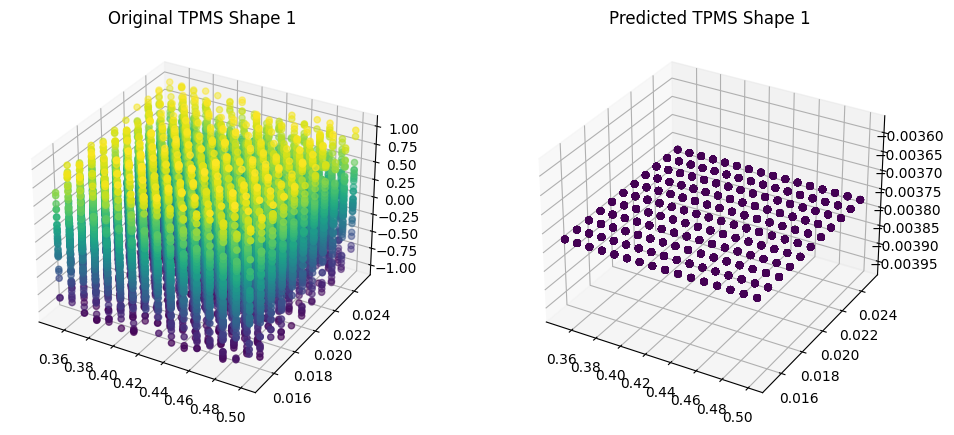

In [25]:
i = 0  # Choose the specific index you want to visualize

fig = plt.figure(figsize=(12, 5))

# Original shape
ax = fig.add_subplot(121, projection='3d')
ax.set_title(f'Original TPMS Shape {i + 1}')
ax.scatter(X_test[:, 0].reshape(100, 200), X_test[:, 1].reshape(100, 200), y_test[:, 0].reshape(100, 200), c=y_test[:, 0], cmap='viridis')

# Predicted shape
ax = fig.add_subplot(122, projection='3d')
ax.set_title(f'Predicted TPMS Shape {i + 1}')
ax.scatter(X_test[:, 0].reshape(100, 200), X_test[:, 1].reshape(100, 200), y_pred[:, 0].reshape(100, 200), c=y_pred[:, 0], cmap='viridis')

plt.show()



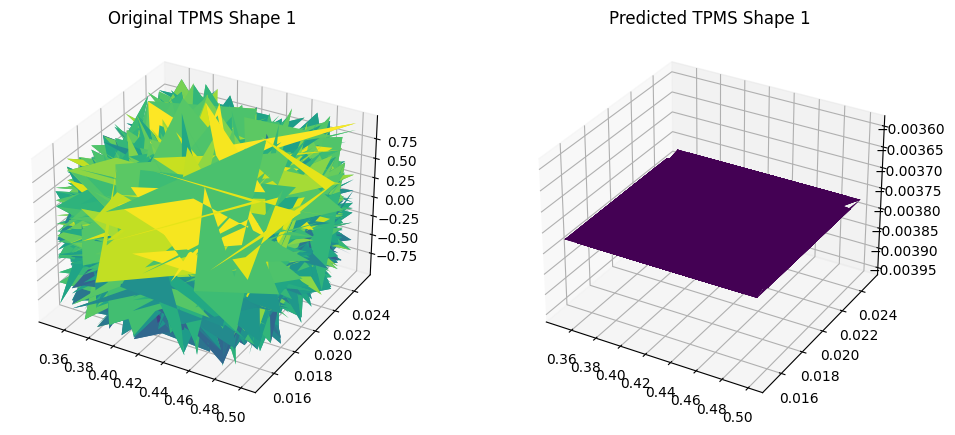

In [26]:
from mpl_toolkits.mplot3d import Axes3D

i = 0  # Choose the specific index you want to visualize

fig = plt.figure(figsize=(12, 5))

# Original shape
ax = fig.add_subplot(121, projection='3d')
ax.set_title(f'Original TPMS Shape {i + 1}')
ax.plot_surface(X_test[:, 0].reshape(100, 200), X_test[:, 1].reshape(100, 200), y_test[:, 0].reshape(100, 200), cmap='viridis')

# Predicted shape
ax = fig.add_subplot(122, projection='3d')
ax.set_title(f'Predicted TPMS Shape {i + 1}')
ax.plot_surface(X_test[:, 0].reshape(100, 200), X_test[:, 1].reshape(100, 200), y_pred[:, 0].reshape(100, 200), cmap='viridis')

plt.show()


In [27]:
i = 0  # Choose the specific index you want to visualize

# Original shape
print(f'Original TPMS Shape {i + 1} - Actual Values:')
print(y_test[:, 0].reshape(100, 200))

# Predicted shape
print(f'Predicted TPMS Shape {i + 1} - Predicted Values:')
print(y_pred[:, 0].reshape(100, 200))


Original TPMS Shape 1 - Actual Values:
[[-4.84383172e-01 -4.21451888e-01 -7.94159714e-01 ...  1.66830587e-01
  -6.35776999e-01  9.56475153e-01]
 [ 3.08113959e-01  2.70088273e-01 -1.89048969e-01 ...  2.76985853e-01
   5.92076346e-01 -1.54130157e-01]
 [ 3.93499711e-01 -1.12233129e-16  8.76302175e-01 ... -4.89447160e-01
  -4.06347895e-01  3.28352814e-02]
 ...
 [ 2.90662282e-02  6.24001382e-01  9.37645914e-01 ... -2.65773544e-01
  -8.83786704e-01  3.16640549e-02]
 [-7.94881353e-01  2.59206863e-01  9.05686150e-01 ...  1.47877400e-01
   5.35796636e-01  1.26337582e-01]
 [-9.62393647e-02 -5.19488337e-01 -3.14052363e-01 ... -1.68024019e-01
  -5.38305926e-01  4.76910331e-01]]
Predicted TPMS Shape 1 - Predicted Values:
[[-0.00377185 -0.00377185 -0.00377185 ... -0.00377185 -0.00377185
  -0.00377185]
 [-0.00377185 -0.00377185 -0.00377185 ... -0.00377185 -0.00377185
  -0.00377185]
 [-0.00377185 -0.00377185 -0.00377185 ... -0.00377185 -0.00377185
  -0.00377185]
 ...
 [-0.00377185 -0.00377185 -0.00377

625/625 [==============================] - 1s 1ms/step


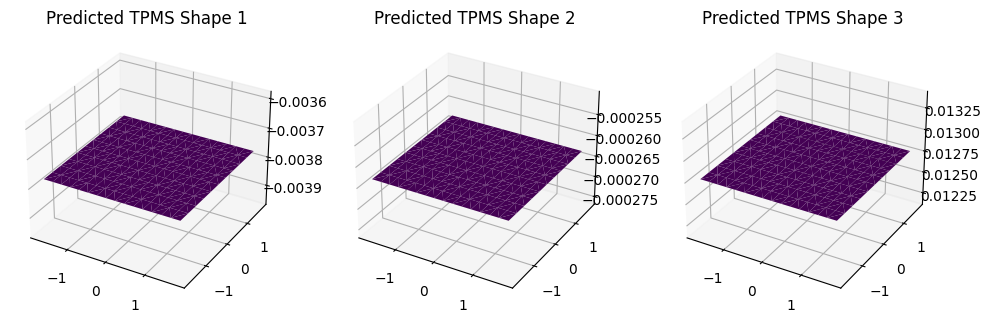

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.tri import Triangulation

# Assuming you have loaded your testing data X_test_scaled
# Use the trained model to predict shapes
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the scaled predictions to get the original scale
y_pred = scaler_output.inverse_transform(y_pred_scaled)

# Reshape the predictions to the shape of the original 'y_test' array
y_pred = y_pred.reshape(y_test.shape)

# Plot the predicted shapes
n_dimensions = y_pred.shape[1]
fig, axs = plt.subplots(1, n_dimensions, figsize=(4 * n_dimensions, 4), subplot_kw={'projection': '3d'})

for i in range(n_dimensions):
    axs[i].set_title(f'Predicted TPMS Shape {i + 1}')

    # Increase the resolution of the surface plot
    triang = Triangulation(X_test_scaled[:, 0], X_test_scaled[:, 1])
    axs[i].plot_trisurf(triang, y_pred[:, i], cmap='viridis', linewidth=0.2, antialiased=True)

plt.show()
